# **Лабораторна робота 2**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моделі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

np.random.seed(42)


Завантажимо дані

In [2]:
import pandas as pd

data = pd.read_csv('linear_separable_data.csv')

print(data.head())

X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

          x         y class
0  2.558692  2.764160     A
1  3.402441  2.605979     A
2  2.312441  3.995115     A
3  2.431570  2.654146     A
4  2.564522  3.035845     A


Створимо та навчимо моделі

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Логістична регресія': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Дерево рішень': DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label='B'),
        'recall': recall_score(y_test, y_pred, pos_label='B'),
        'f1': f1_score(y_test, y_pred, pos_label='B'),
        'model': model
    }

Виведемо оцінки продуктивності

In [4]:
print("Результати оцінки продуктивності моделей:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")

Результати оцінки продуктивності моделей:

Логістична регресія:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

SVM:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Дерево рішень:
Accuracy: 0.9967
Precision: 1.0000
Recall: 0.9933
F1-score: 0.9967


Візуалізуємо результати

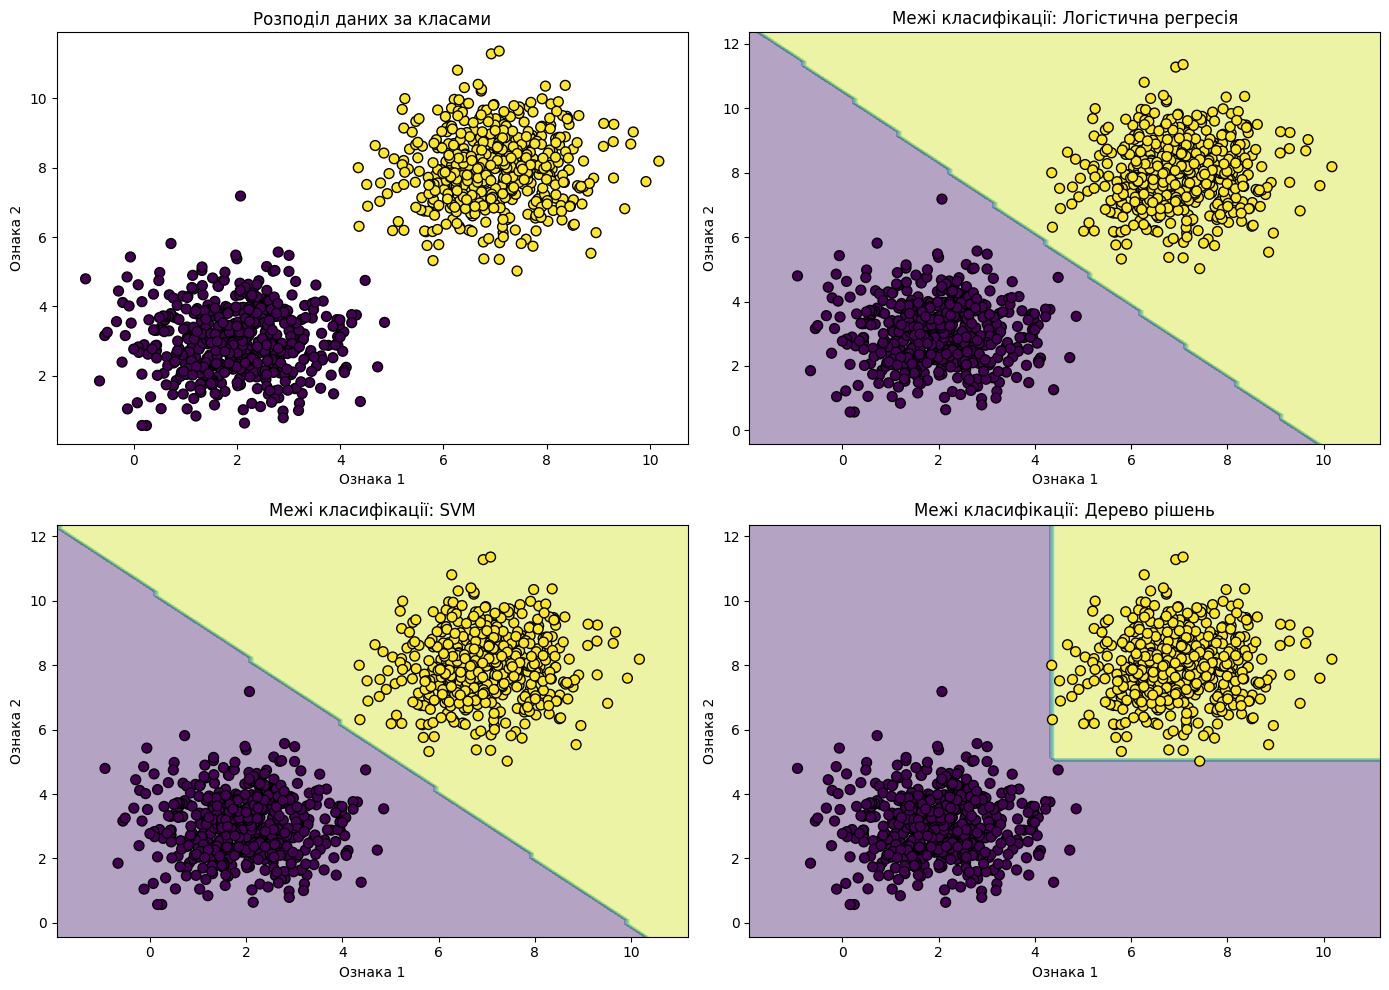

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

label_to_color = {'A': 0, 'B': 1}
y_numeric = np.array([label_to_color[label] for label in y])

axes[0].scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='viridis', edgecolors='k', s=50)
axes[0].set_title('Розподіл даних за класами')
axes[0].set_xlabel('Ознака 1')
axes[0].set_ylabel('Ознака 2')

for i, (name, metrics) in enumerate(results.items(), 1):
    model = metrics['model']
    
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        alpha=0.4,
        ax=axes[i],
        cmap='viridis',
        response_method="predict"
    )
    
    y_numeric = np.array([label_to_color[label] for label in y])
    axes[i].scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='viridis', edgecolors='k', s=50)
    axes[i].set_title(f'Межі класифікації: {name}')
    axes[i].set_xlabel('Ознака 1')
    axes[i].set_ylabel('Ознака 2')

plt.tight_layout()

Порівняємо метрики у вигляді гістограм

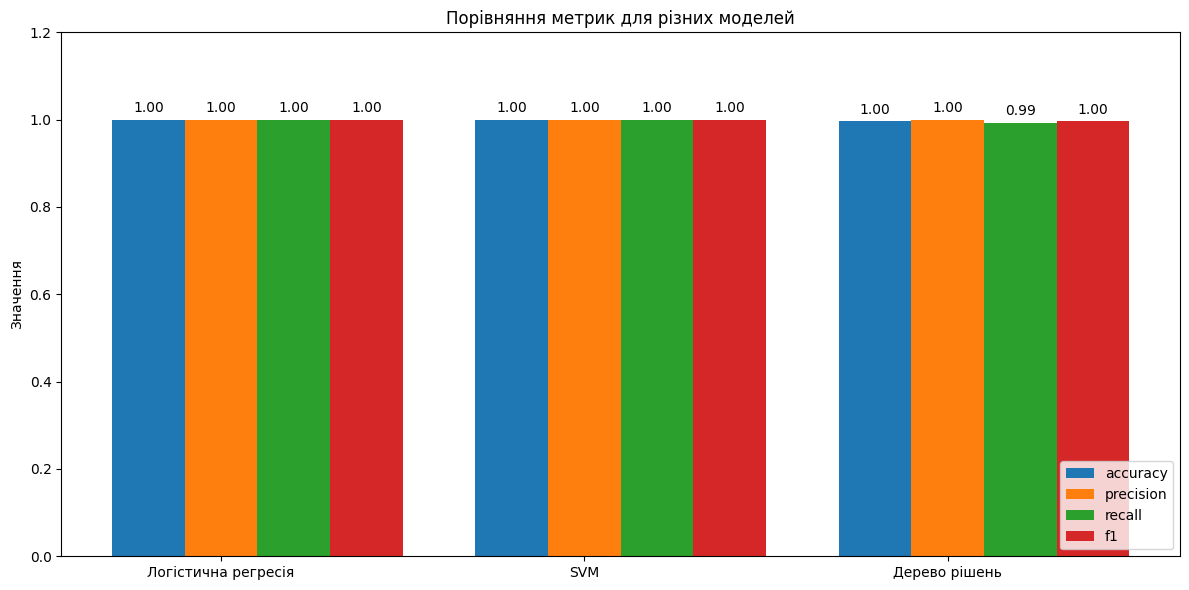

In [6]:
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
models_names = list(results.keys())
metrics_values = {
    metric: [results[model][metric] for model in models_names]
    for metric in metrics_names
}

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models_names))
width = 0.2
multiplier = 0

for metric_name, metric_values in metrics_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, metric_values, width, label=metric_name)
    ax.bar_label(rects, fmt='%.2f', padding=3)
    multiplier += 1

ax.set_xticks(x + width, models_names)
ax.set_ylabel('Значення')
ax.set_title('Порівняння метрик для різних моделей')
ax.legend(loc='lower right')
ax.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

Проаналізуємо результати

In [7]:

print("\nАналіз результатів:")
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"Найкраща модель за метрикою accuracy: {best_model[0]} з показником {best_model[1]['accuracy']:.4f}")

for name, metrics in results.items():
    print(f"\n{name}:")
    if name == best_model[0]:
        print("Ця модель має найкращу точність класифікації для даного набору даних.")
    
    if name == 'Логістична регресія':
        print("Логістична регресія ефективна для лінійно роздільних даних, оскільки встановлює пряму лінію, що розділяє класи.")
    elif name == 'SVM':
        print("SVM з лінійним ядром знаходить оптимальну гіперплощину, яка максимізує відстань між класами.")
    elif name == 'Дерево рішень':
        print("Дерево рішень створює прямокутні області розділення, що може бути менш ефективним для лінійно роздільних даних.")


Аналіз результатів:
Найкраща модель за метрикою accuracy: Логістична регресія з показником 1.0000

Логістична регресія:
Ця модель має найкращу точність класифікації для даного набору даних.
Логістична регресія ефективна для лінійно роздільних даних, оскільки встановлює пряму лінію, що розділяє класи.

SVM:
SVM з лінійним ядром знаходить оптимальну гіперплощину, яка максимізує відстань між класами.

Дерево рішень:
Дерево рішень створює прямокутні області розділення, що може бути менш ефективним для лінійно роздільних даних.


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моделі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

Підготуємо та розділимо дані на навчальний та тестовий набори

In [9]:

df = pd.read_csv('overlapping_classes_dataset.csv')
print(df.head())

X = df[['x', 'y']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

          x         y  class
0 -0.420054 -0.481703      1
1 -1.377273  0.383766      1
2  0.343787  0.049265      1
3 -1.923326 -0.814440      1
4  0.196427  0.699969      1


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "K-найближчих сусідів (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Нейронна мережа (MLP)": MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42),
    "Випадковий ліс (RandomForest)": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
y_pred_dict = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_pred_dict[name] = y_pred
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'model': model
    }

порівняємо результати

In [11]:
results_df = pd.DataFrame(results).T
print("Порівняння моделей за метриками:")
print(results_df)

top_models = results_df.sort_values(by='f1', ascending=False).head(3).index.tolist()
print("\nТоп-3 моделі за F1-score:")
for model_name in top_models:
    print(f"- {model_name}")

for name in top_models:
    print(f"\nДетальний аналіз моделі: {name}")
    
    y_pred = y_pred_dict[name]
    
    print("\nЗвіт класифікації:")
    print(classification_report(y_test, y_pred))

Порівняння моделей за метриками:
                               accuracy precision    recall        f1  \
K-найближчих сусідів (KNN)      0.87037  0.874325   0.87037  0.868999   
Нейронна мережа (MLP)          0.896296  0.901431  0.896296  0.895678   
Випадковий ліс (RandomForest)   0.87037   0.87055   0.87037  0.869807   

                                                                           model  
K-найближчих сусідів (KNN)                                KNeighborsClassifier()  
Нейронна мережа (MLP)          MLPClassifier(hidden_layer_sizes=(10, 5), max_...  
Випадковий ліс (RandomForest)  (DecisionTreeClassifier(max_features='sqrt', r...  

Топ-3 моделі за F1-score:
- Нейронна мережа (MLP)
- Випадковий ліс (RandomForest)
- K-найближчих сусідів (KNN)

Детальний аналіз моделі: Нейронна мережа (MLP)

Звіт класифікації:
              precision    recall  f1-score   support

           1       0.94      0.95      0.95        83
           2       0.93      0.81      0.87       111

Створимо функцію перевірки перетину

In [12]:
from scipy.stats import multivariate_normal

centers = [
    (0, 0),     
    (3, 2),      
    (1, 4)   
]

cov_matrices = [
    [[1.2, 0.5], [0.5, 1.0]],   
    [[1.0, -0.3], [-0.3, 1.2]], 
    [[1.5, 0.2], [0.2, 0.8]] 
]

def is_in_overlap(point, threshold=0.1):
    densities = []
    for i in range(3):
        mvn = multivariate_normal(centers[i], cov_matrices[i])
        density = mvn.pdf(point)
        densities.append(density)
    
    high_density_classes = sum(1 for d in densities if d > threshold)
    return high_density_classes > 1, densities

Зберемо аналітику помилок

In [13]:
errors_analysis = {}
    
for name in top_models:
    model = models[name]
    y_pred = y_pred_dict[name]
    
    errors_in_overlap = 0
    errors_outside_overlap = 0
    total_in_overlap = 0
    total_outside_overlap = 0
    
    class_errors = {1: 0, 2: 0, 3: 0}
    class_totals = {1: 0, 2: 0, 3: 0}
    
    for i, (x, y) in enumerate(zip(X_test, y_test)):
        is_overlap, densities = is_in_overlap(x)
        if is_overlap:
            total_in_overlap += 1
            if y_pred[i] != y:
                errors_in_overlap += 1
        else:
            total_outside_overlap += 1
            if y_pred[i] != y:
                errors_outside_overlap += 1
        
        class_totals[y] += 1
        if y_pred[i] != y:
            class_errors[y] += 1
    
    error_rate_in_overlap = errors_in_overlap / total_in_overlap if total_in_overlap > 0 else 0
    error_rate_outside_overlap = errors_outside_overlap / total_outside_overlap if total_outside_overlap > 0 else 0
    
    class_error_rates = {c: class_errors[c] / class_totals[c] if class_totals[c] > 0 else 0 for c in [1, 2, 3]}
    
    errors_analysis[name] = {
        'errors_in_overlap': errors_in_overlap,
        'errors_outside_overlap': errors_outside_overlap,
        'total_in_overlap': total_in_overlap,
        'total_outside_overlap': total_outside_overlap,
        'error_rate_in_overlap': error_rate_in_overlap,
        'error_rate_outside_overlap': error_rate_outside_overlap,
        'class_error_rates': class_error_rates
    }

Візуалізуємо помилки

<Figure size 1200x600 with 0 Axes>

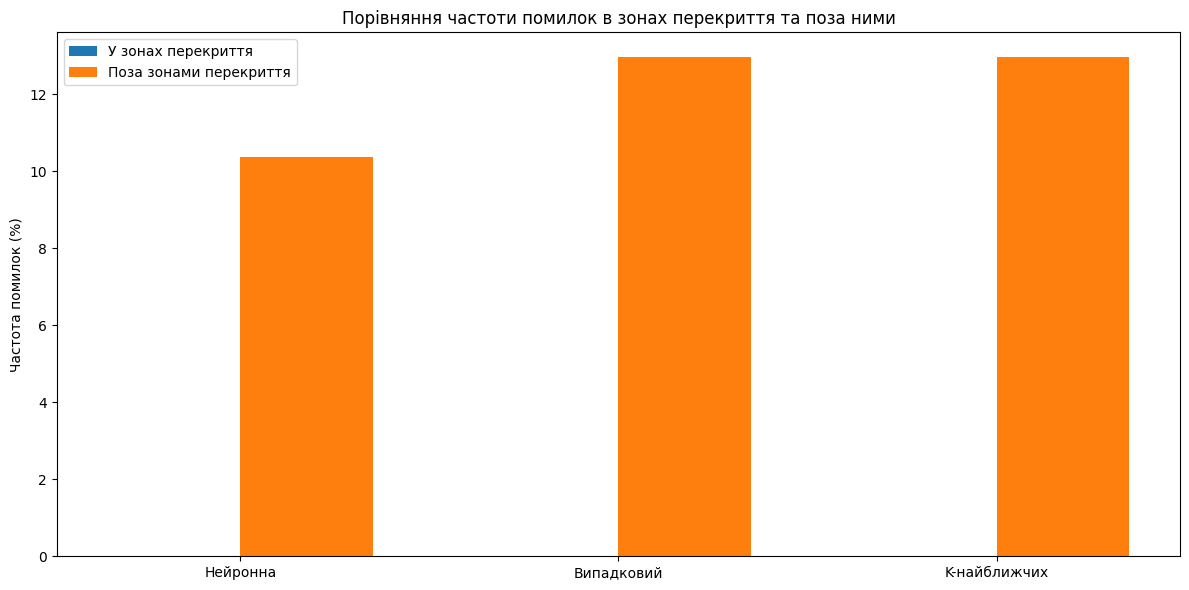

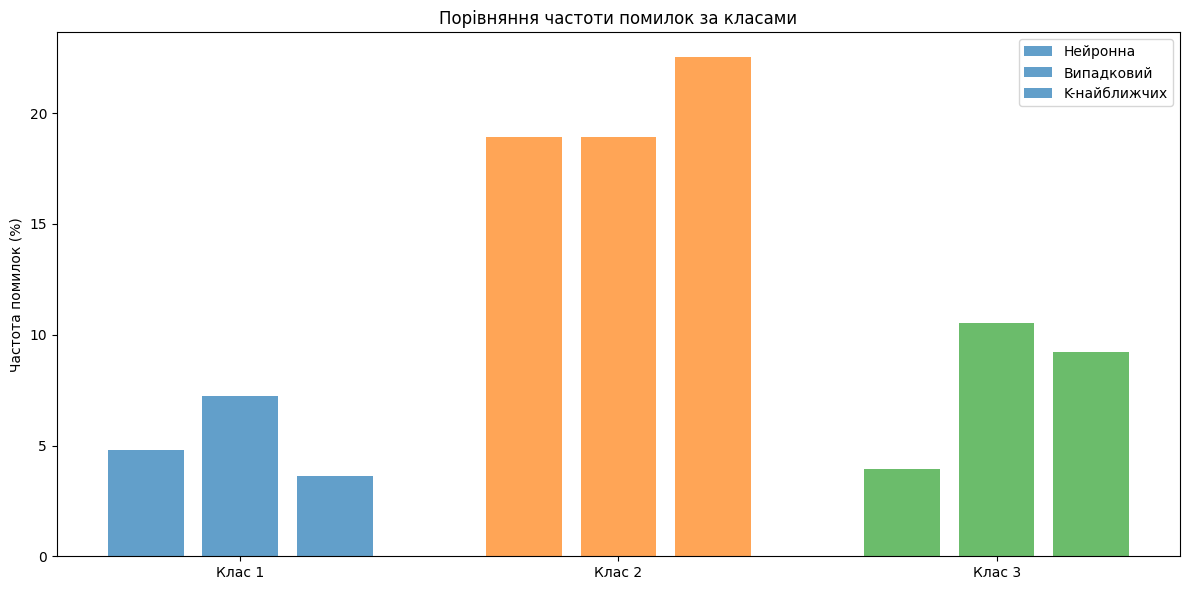

In [14]:
plt.figure(figsize=(12, 6))
models_names = list(errors_analysis.keys())
overlap_error_rates = [analysis['error_rate_in_overlap'] for analysis in errors_analysis.values()]
outside_error_rates = [analysis['error_rate_outside_overlap'] for analysis in errors_analysis.values()]

x = np.arange(len(models_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, [rate * 100 for rate in overlap_error_rates], width, label='У зонах перекриття')
rects2 = ax.bar(x + width/2, [rate * 100 for rate in outside_error_rates], width, label='Поза зонами перекриття')

ax.set_ylabel('Частота помилок (%)')
ax.set_title('Порівняння частоти помилок в зонах перекриття та поза ними')
ax.set_xticks(x)
ax.set_xticklabels([name.split()[0] for name in models_names])
ax.legend()

plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, name in enumerate(models_names):
    error_rates = [errors_analysis[name]['class_error_rates'][c] * 100 for c in [1, 2, 3]]
    x_pos = np.arange(3) + i * 0.25
    ax.bar(x_pos, error_rates, width=0.2, color=class_colors, alpha=0.7, label=name.split()[0])

ax.set_ylabel('Частота помилок (%)')
ax.set_title('Порівняння частоти помилок за класами')
ax.set_xticks(np.arange(3) + 0.25)
ax.set_xticklabels(['Клас 1', 'Клас 2', 'Клас 3'])
ax.legend()

plt.tight_layout()
plt.savefig('class_error_analysis.png', dpi=300)
plt.show()

Висновки:
1. Перекриття між класами значно впливає на продуктивність моделей класифікації
2. Усі моделі мають вищу частоту помилок у зонах перекриття порівняно з областями, де класи чітко відокремлені
3. Нейронна мережа показує кращі результати для даного набору даних
4. RandomForest добре справляється з класифікацією поза зонами перекриття


**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [15]:
from httpx import head
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('torus_dataset.csv')
print(df.head())

          x         y  class
0 -2.163374  2.175912    1.0
1  3.214687 -1.028587    1.0
2 -0.360142 -3.169691    1.0
3 -2.347915 -1.675806    1.0
4  1.570291  2.342728    1.0


Підготуємо дані

In [16]:
X = df[['x', 'y']].values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Функція для перевірки моделей

In [17]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name, scaled=False):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }
    
    print(f"\n{name} - Результати:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 8))
    
    h = 0.05
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    test_data = X_test_scaled if scaled else X_test
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))
    
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='blue', s=20, edgecolor='k', label='Клас 1')
    plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], c='red', s=20, edgecolor='k', label='Клас 2')
    
    plt.title(f'Класифікація даних за допомогою {name}')
    plt.xlabel('X'), plt.ylabel('Y')
    plt.legend(), plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f'{name.replace(" ", "_").lower()}_classification.png', dpi=300)
    plt.show()
    
    return metrics

Застосуємо моделі та візуалізуємо результат


--- Модель: KNN ---

KNN - Результати:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


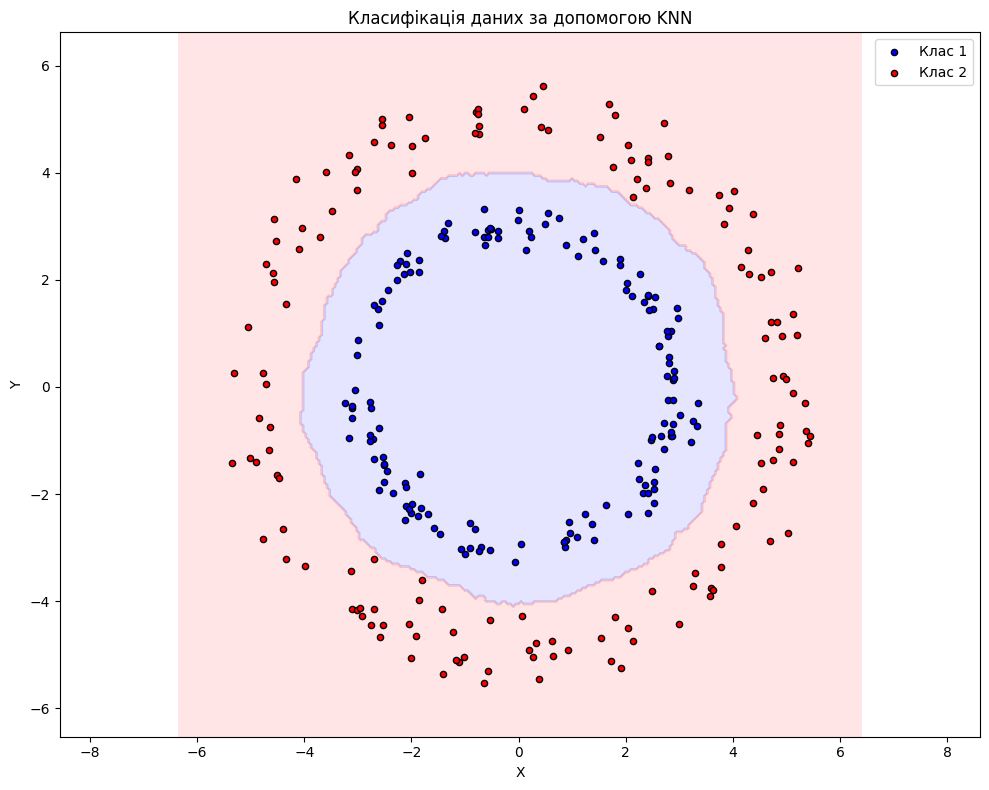


--- Модель: SVM ---

SVM - Результати:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


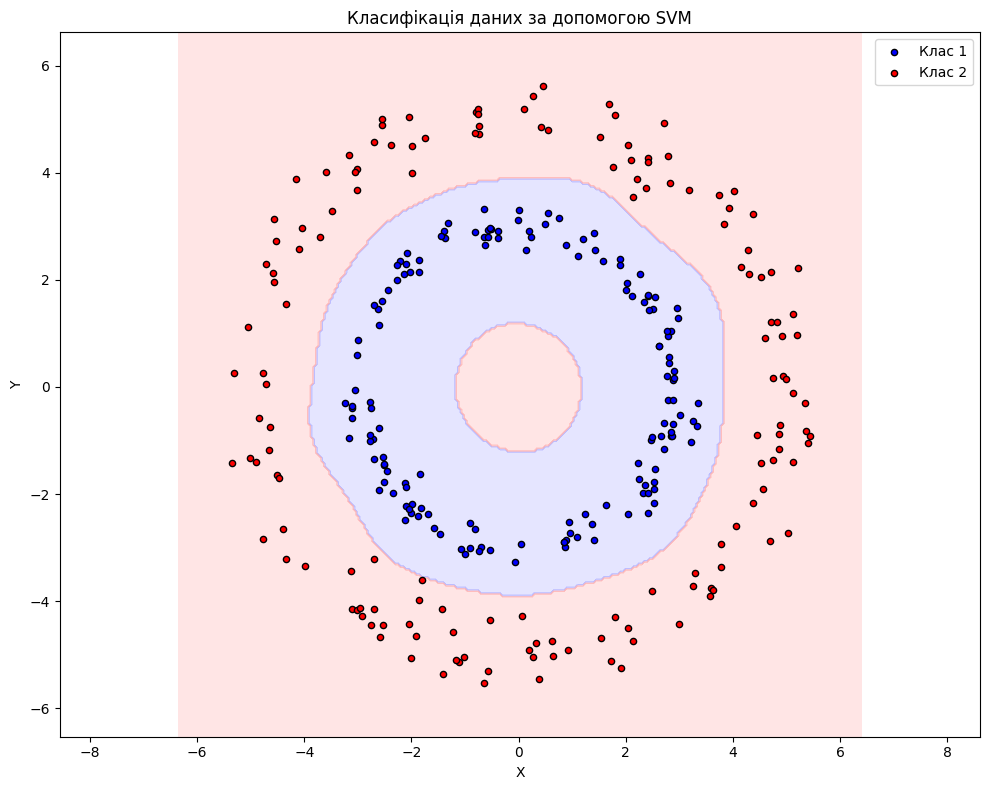


--- Модель: MLP ---

MLP - Результати:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


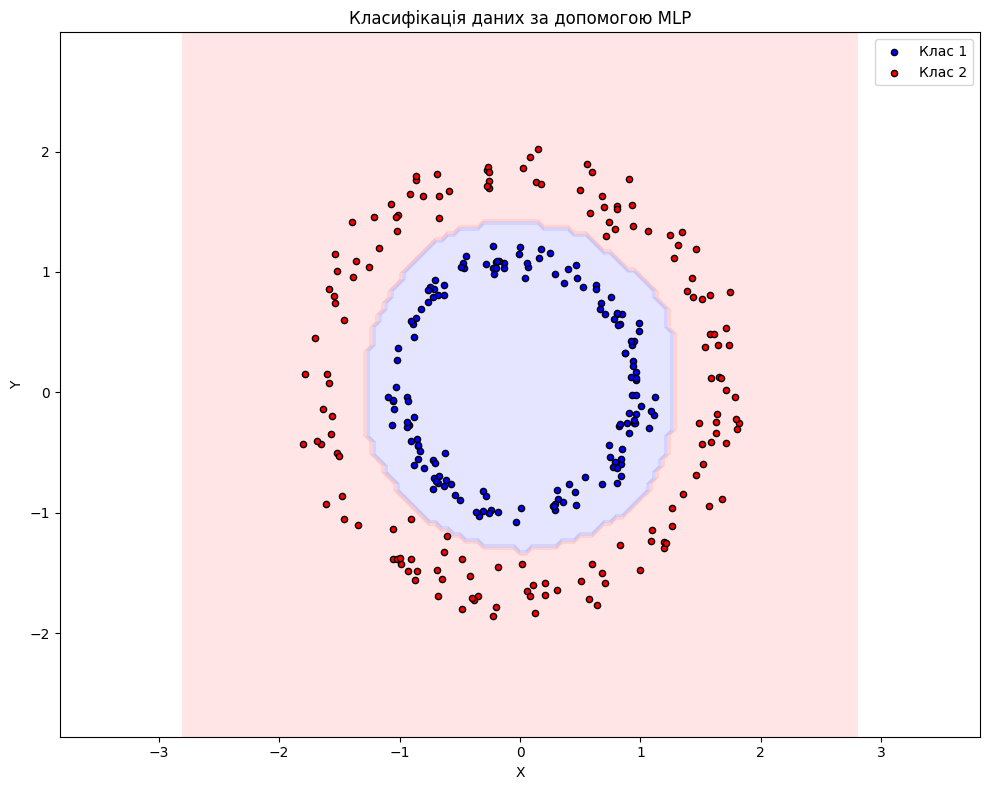


Порівняння моделей:
Модель  Accuracy  Precision  Recall  F1
   KNN       1.0        1.0     1.0 1.0
   SVM       1.0        1.0     1.0 1.0
   MLP       1.0        1.0     1.0 1.0


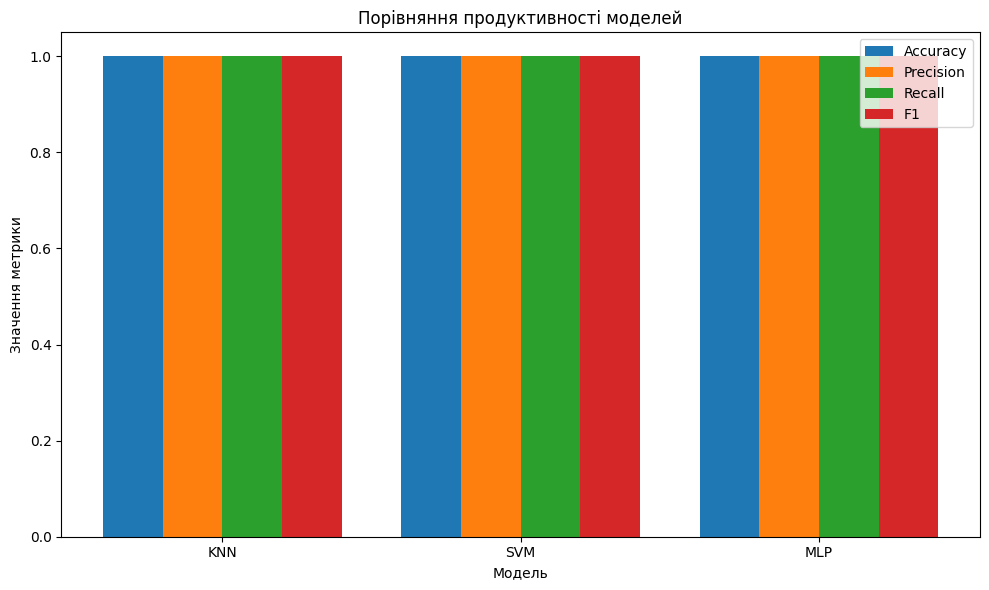

In [18]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'SVM': SVC(kernel='rbf', gamma='auto', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n--- Модель: {name} ---")
    if name == 'MLP':
        metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name, scaled=True)
    else:
        metrics = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    metrics['Модель'] = name
    results.append(metrics)

comparison_df = pd.DataFrame(results)
comparison_df = comparison_df[['Модель', 'Accuracy', 'Precision', 'Recall', 'F1']]

print("\nПорівняння моделей:")
print(comparison_df.to_string(index=False))

plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(index + i*bar_width, comparison_df[metric], bar_width, label=metric)

plt.xlabel('Модель')
plt.ylabel('Значення метрики')
plt.title('Порівняння продуктивності моделей')
plt.xticks(index + bar_width * 1.5, comparison_df['Модель'])
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]['Модель']
best_accuracy = comparison_df.loc[comparison_df['Accuracy'].idxmax()]['Accuracy']

Висновок: всі моделі однаково добре впоралися з класифікацією

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


Завантажимо раніше згенеровані дані

In [20]:
df = pd.read_csv('double_spiral_dataset.csv')
print(df.head())

X = df[['x', 'y']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

          x         y  class
0  0.049671  0.092618      1
1 -0.003756  0.191195      1
2  0.084890 -0.138842      1
3  0.182437  0.058578      1
4  0.016673 -0.061012      1


Функція для візуалізації даних та меж класифікації

In [21]:
def plot_decision_boundary(model, X, y, model_name, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', 
                         cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'Межа класифікації: {model_name}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, linestyle='--', alpha=0.6)
    return ax

Функція для оцінки моделі та виведення метрик

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return model, accuracy, precision, recall, f1

Візуалізуємо межі класифікацій

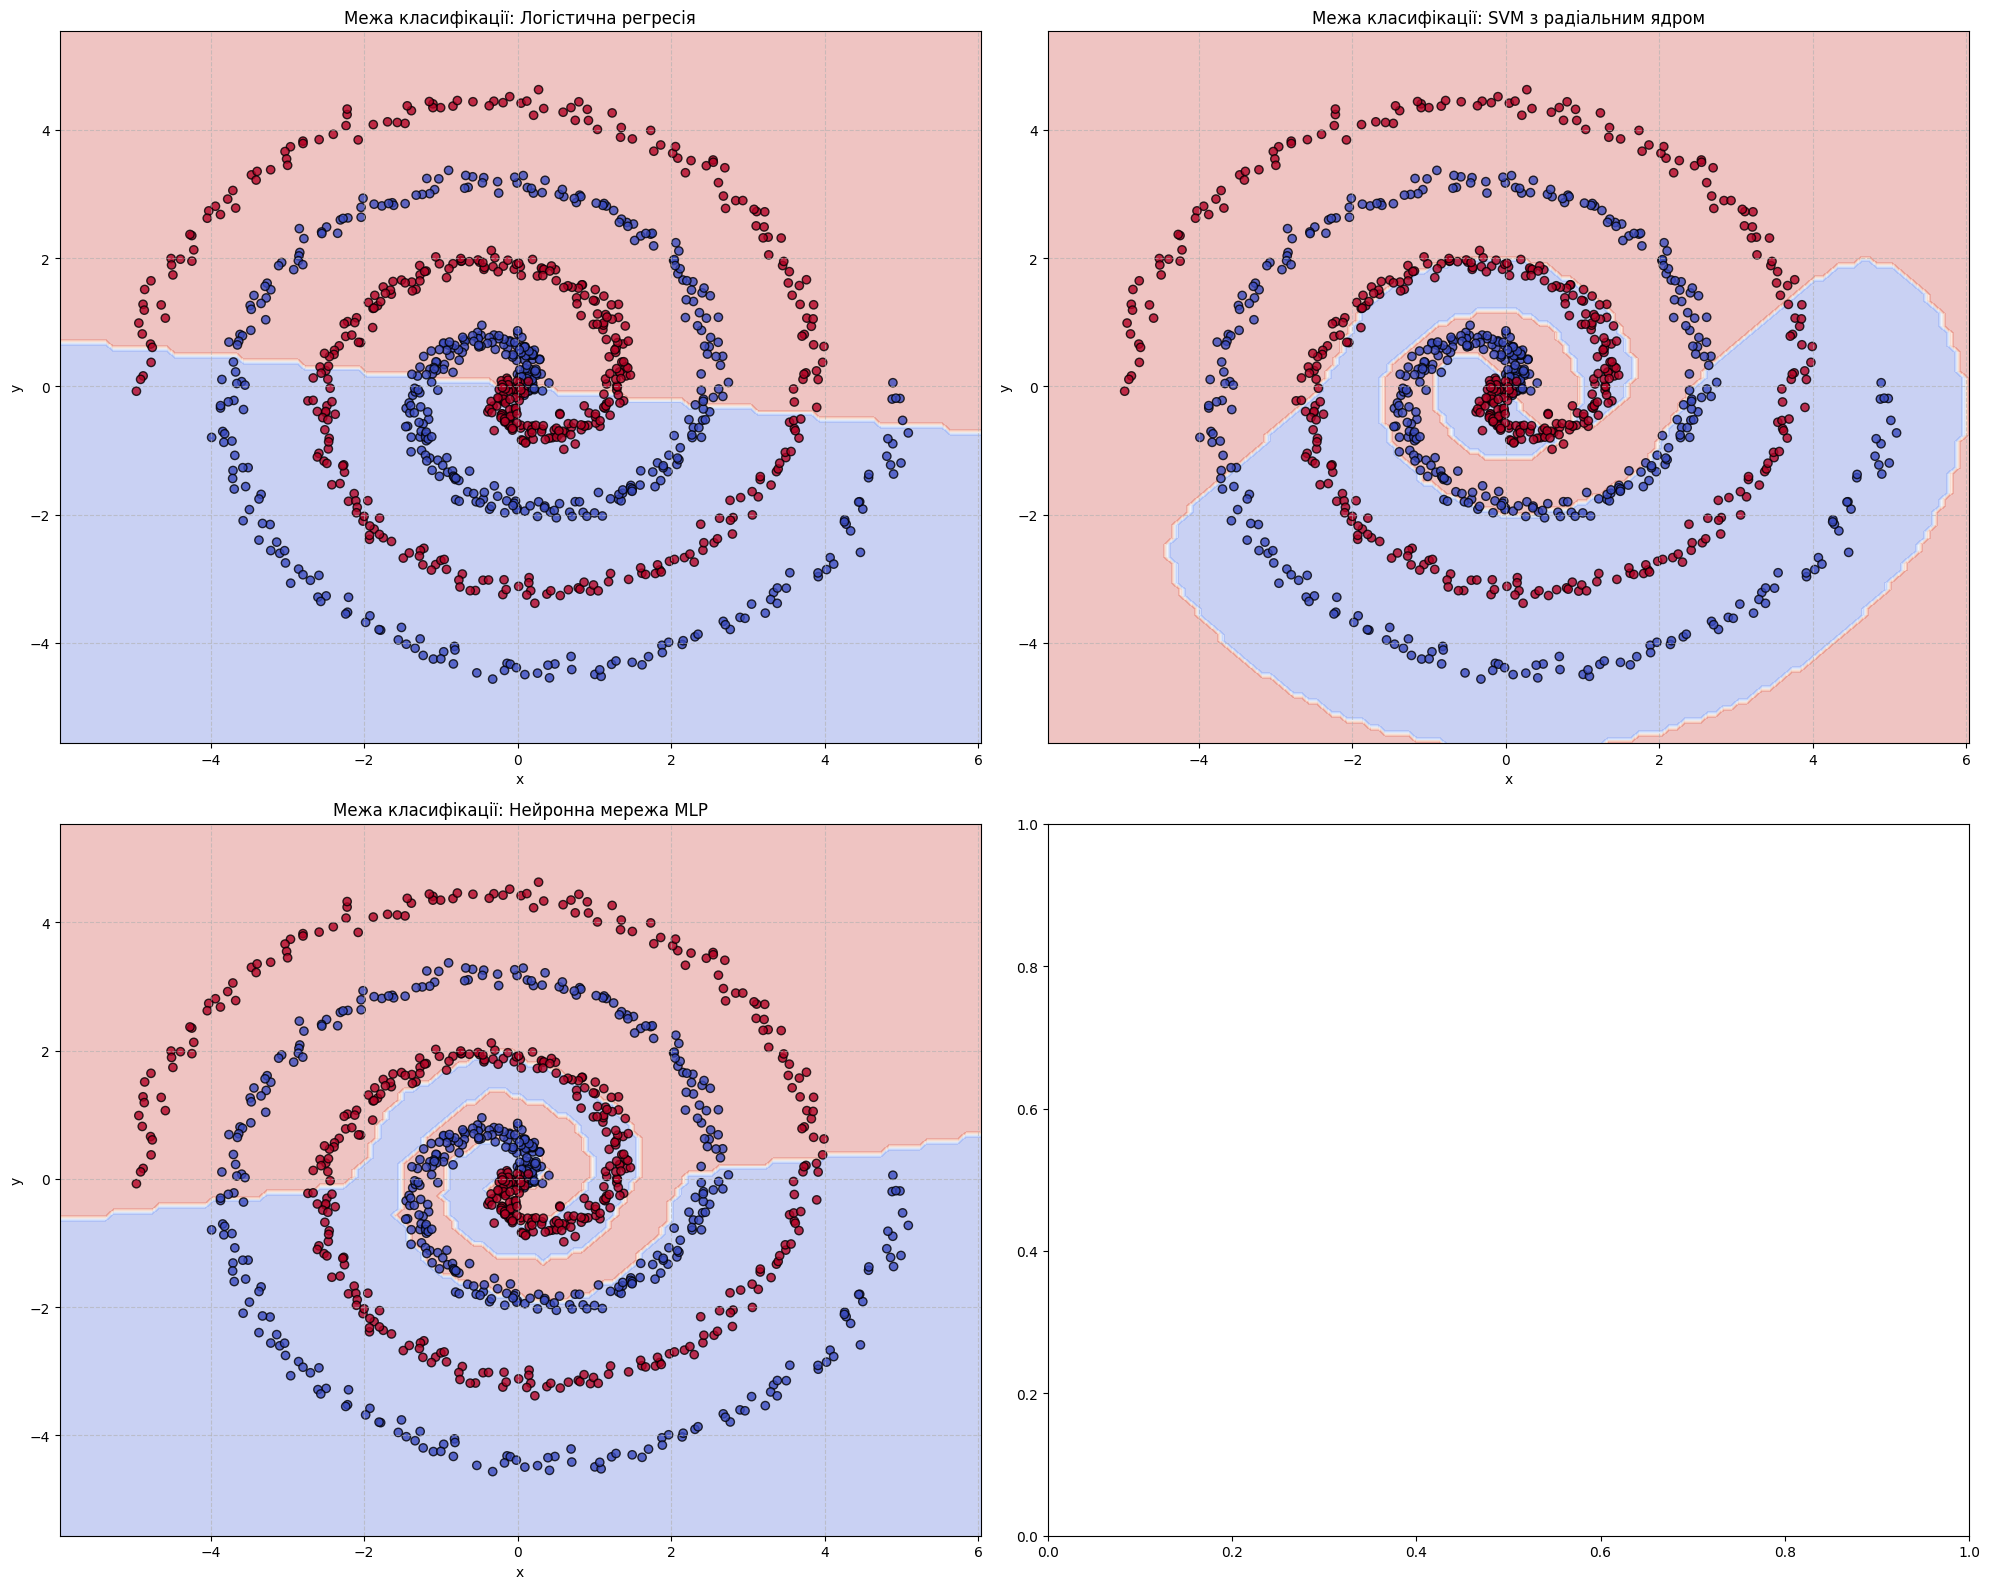

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model, log_reg_acc, log_reg_prec, log_reg_recall, log_reg_f1 = evaluate_model(
    log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Логістична регресія")

svm_rbf = SVC(kernel='rbf', gamma='auto', C=10, probability=True, random_state=42)
svm_model, svm_acc, svm_prec, svm_recall, svm_f1 = evaluate_model(
    svm_rbf, X_train_scaled, X_test_scaled, y_train, y_test, "SVM з радіальним ядром")

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), 
                    activation='relu', 
                    solver='adam', 
                    max_iter=2000, 
                    random_state=42)
mlp_model, mlp_acc, mlp_prec, mlp_recall, mlp_f1 = evaluate_model(
    mlp, X_train_scaled, X_test_scaled, y_train, y_test, "Нейронна мережа MLP")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

log_reg_full = LogisticRegression(max_iter=1000, random_state=42)
log_reg_full.fit(scaler.fit_transform(X), y)

svm_rbf_full = SVC(kernel='rbf', gamma='auto', C=10, probability=True, random_state=42)
svm_rbf_full.fit(scaler.fit_transform(X), y)

mlp_full = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=2000, random_state=42)
mlp_full.fit(scaler.fit_transform(X), y)

plot_decision_boundary(log_reg_full, X, y, "Логістична регресія", ax=axes[0])
plot_decision_boundary(svm_rbf_full, X, y, "SVM з радіальним ядром", ax=axes[1])
plot_decision_boundary(mlp_full, X, y, "Нейронна мережа MLP", ax=axes[2])

plt.tight_layout()
plt.savefig('classification_boundaries.png')
plt.show()

Візуалізація порівняння метрик


===== Порівняння результатів моделей =====
                Модель  Accuracy  Precision    Recall  F1 Score
0  Логістична регресія  0.473333   0.466667  0.373333  0.414815
1            SVM (rbf)  0.746667   0.772059  0.700000  0.734266
2                  MLP  0.983333   0.993197  0.973333  0.983165


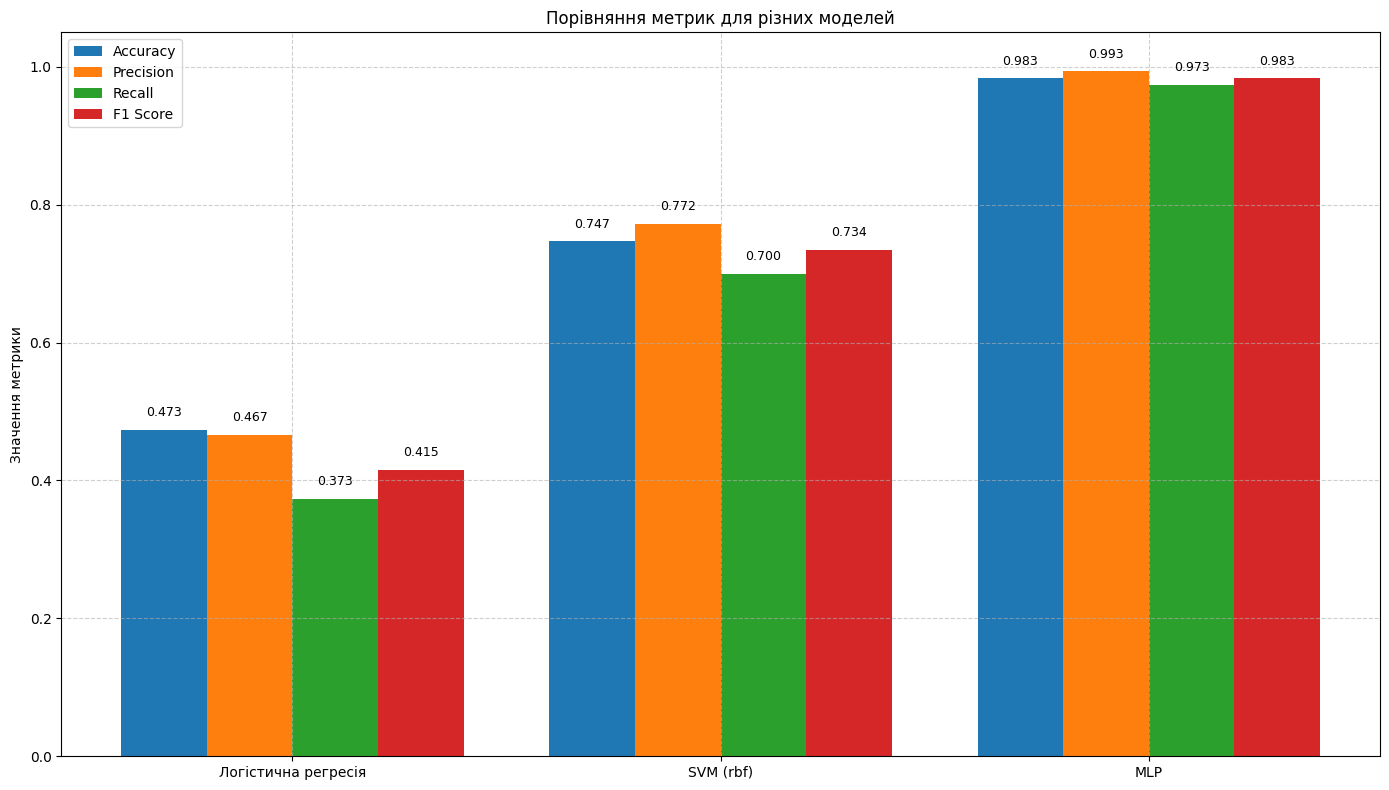


Найкраща модель за F1 Score: MLP (F1 = 0.9832)


In [24]:
models = ["Логістична регресія", "SVM (rbf)", "MLP"]
acc_scores = [log_reg_acc, svm_acc, mlp_acc]
precision_scores = [log_reg_prec, svm_prec, mlp_prec]
recall_scores = [log_reg_recall, svm_recall, mlp_recall]
f1_scores = [log_reg_f1, svm_f1, mlp_f1]

results_df = pd.DataFrame({
    'Модель': models,
    'Accuracy': acc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("\n===== Порівняння результатів моделей =====")
print(results_df)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(models))
width = 0.2

ax.bar(x - width*1.5, acc_scores, width, label='Accuracy')
ax.bar(x - width/2, precision_scores, width, label='Precision')
ax.bar(x + width/2, recall_scores, width, label='Recall')
ax.bar(x + width*1.5, f1_scores, width, label='F1 Score')

ax.set_ylim(0, 1.05)
ax.set_ylabel('Значення метрики')
ax.set_title('Порівняння метрик для різних моделей')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

for i, model in enumerate(models):
    ax.text(i - width*1.5, acc_scores[i] + 0.02, f'{acc_scores[i]:.3f}', ha='center', fontsize=9)
    ax.text(i - width/2, precision_scores[i] + 0.02, f'{precision_scores[i]:.3f}', ha='center', fontsize=9)
    ax.text(i + width/2, recall_scores[i] + 0.02, f'{recall_scores[i]:.3f}', ha='center', fontsize=9)
    ax.text(i + width*1.5, f1_scores[i] + 0.02, f'{f1_scores[i]:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

best_model_idx = f1_scores.index(max(f1_scores))
best_model_name = models[best_model_idx]
print(f"\nНайкраща модель за F1 Score: {best_model_name} (F1 = {max(f1_scores):.4f})")

### Висновки

1. Набір даних з подвійною спіраллю є нелінійно розділюваним, що робить його складним для класифікації.
2. Лінійні моделі (логістична регресія) показують найгірші результати через нездатність
   вловити спіральну структуру даних.
3. Найкращі результати демонструє MLP завдяки здатності моделювати нелінійні залежності.
4. Нелінійність суттєво впливає на процес класифікації, вимагаючи використання
   складніших моделей з нелінійними характеристиками.
5. Моделі на основі ансамблів дерев та нейронні мережі найкраще справляються з
   класифікацією таких складних структур даних.